In [56]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

tf.__version__

'2.0.0'

In [3]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")

In [9]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


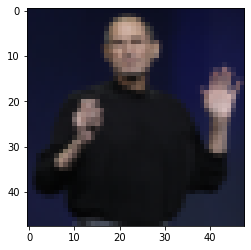

In [10]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [11]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [12]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

<h3>a) Training an CNN from scratch</h3>

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.
- Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
- Calculate the confusion matrix
- Have a look at missclassified examples

Image of the network: https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [91]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',padding='SAME',input_shape=(48, 48, 3)))
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 48, 48, 15)        420       
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 48, 48, 15)        2040      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 24, 24, 30)        4080      
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 24, 24, 30)        8130      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1080)            

In [96]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [97]:
history = model.fit(X_train, Y_train,
          epochs=10, 
          batch_size=16,
          validation_data=(X_valid, Y_valid))

Train on 2000 samples, validate on 400 samples
Epoch 1/10
2000/2000 [==============================] - 23s 11ms/sample - loss: 1.9675 - accuracy: 0.2255 - val_loss: 1.7974 - val_accuracy: 0.3350
Epoch 2/10
2000/2000 [==============================] - 27s 14ms/sample - loss: 1.6991 - accuracy: 0.3550 - val_loss: 1.5406 - val_accuracy: 0.4425
Epoch 3/10
2000/2000 [==============================] - 26s 13ms/sample - loss: 1.4694 - accuracy: 0.4605 - val_loss: 1.4428 - val_accuracy: 0.4550
Epoch 4/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 1.2909 - accuracy: 0.5375 - val_loss: 1.2774 - val_accuracy: 0.5000
Epoch 5/10
2000/2000 [==============================] - 26s 13ms/sample - loss: 1.1316 - accuracy: 0.6040 - val_loss: 1.2518 - val_accuracy: 0.5600
Epoch 6/10
2000/2000 [==============================] - 25s 13ms/sample - loss: 0.9694 - accuracy: 0.6660 - val_loss: 1.1303 - val_accuracy: 0.5875
Epoch 7/10
2000/2000 [==============================] - 25s 13ms/

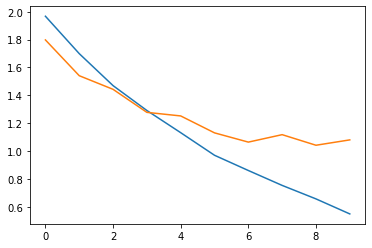

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

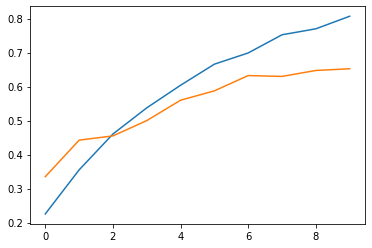

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [100]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9270144367218017
Test accuracy: 0.7
